<a href="https://colab.research.google.com/github/gleblo/msu_science_work/blob/master/1.%20Cells%20extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

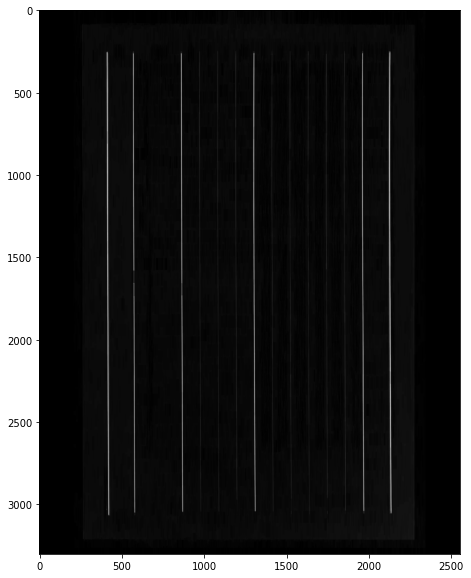

False

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('drive/My Drive/15k toloka/Страницы/0002.jpg', cv2.IMREAD_GRAYSCALE)
color = cv2.imread('drive/My Drive/15k toloka/Страницы/0002.jpg')
img_bin = 255-img

# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))


#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("/Users/YOURPATH/vertical.jpg",vertical_lines)
# Plot the generated image
plt.figure(figsize = (50,10))
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("/Users/YOURPATH/horizontal.jpg",horizontal_lines)
#Plot the generated image
# plt.figure(figsize = (200,40))
# plotting = plt.imshow(image_2,cmap='gray')
# plt.show()

## Detecting coordinates of the grid lines

For vertical lines with demo

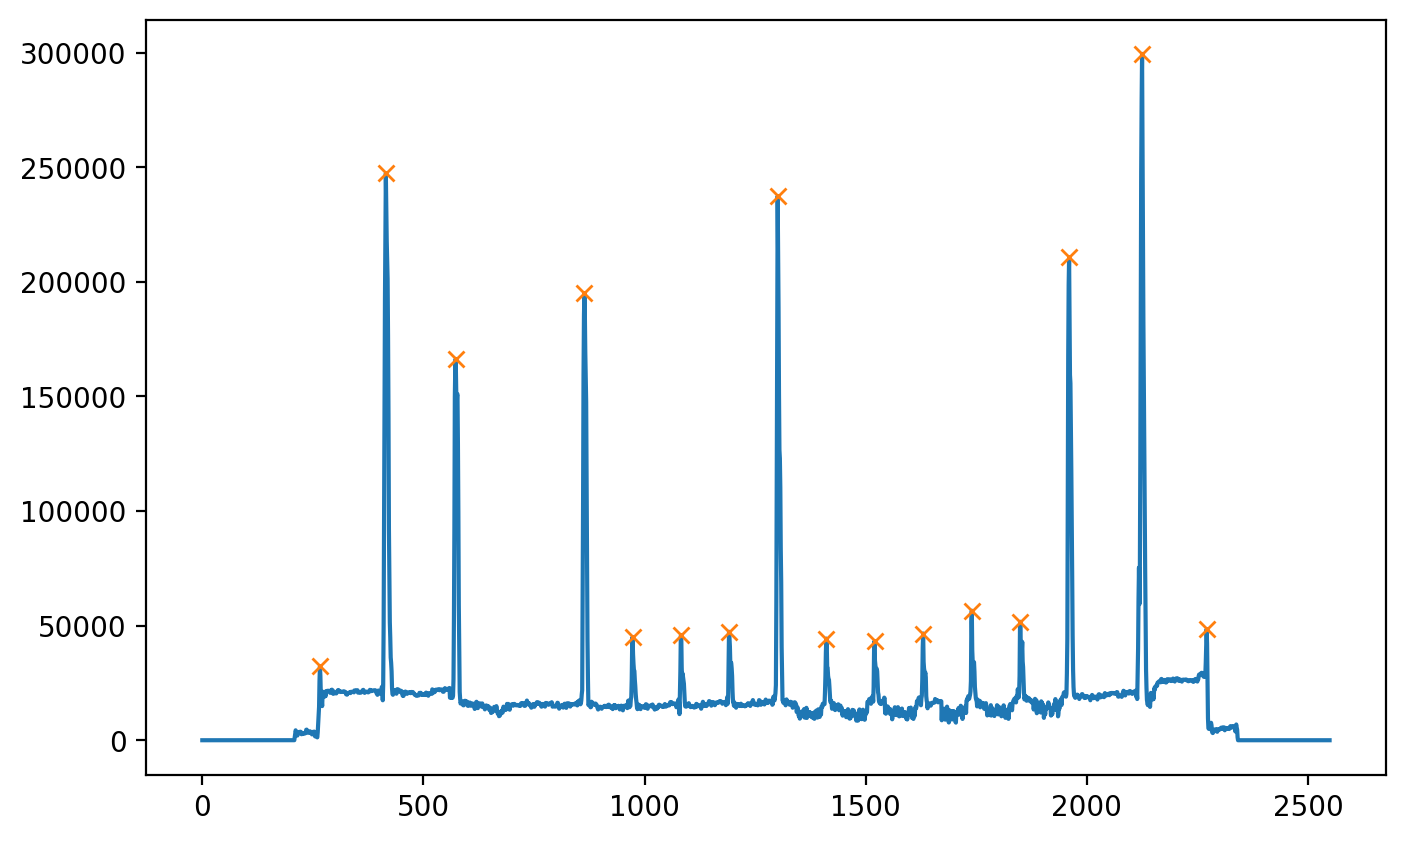

In [ ]:
ar = [image_1[:,i].sum() for i in range(img.shape[1])]
from scipy.signal import find_peaks
ar = [image_1[:,i].sum() for i in range(img.shape[1])]
x = np.array(ar)
peaks, _ = find_peaks(x, prominence = 10000, distance = 10)

# Show peak plots
plt.figure(figsize = (8,5), dpi = 200)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()




new_img = img.copy()
height = img.shape[0]
width = img.shape[1]

for i in peaks:
  new_img[:,i] = 0
  color[:,i] = [0,0,255]

vertical_lines = peaks.copy()

For horizontal lines

In [ ]:
from scipy.signal import find_peaks
ar = [image_2[i,:].sum() for i in range(img.shape[0])]
x = np.array(ar)
peaks, _ = find_peaks(x, prominence = 7000, distance = 10)


for i in peaks:
  new_img[i,:] = 0
  color[i,:] = [0,0,255]


horizontal_lines = peaks.copy()
# cv2_imshow(new_img)

Plot detected table grid

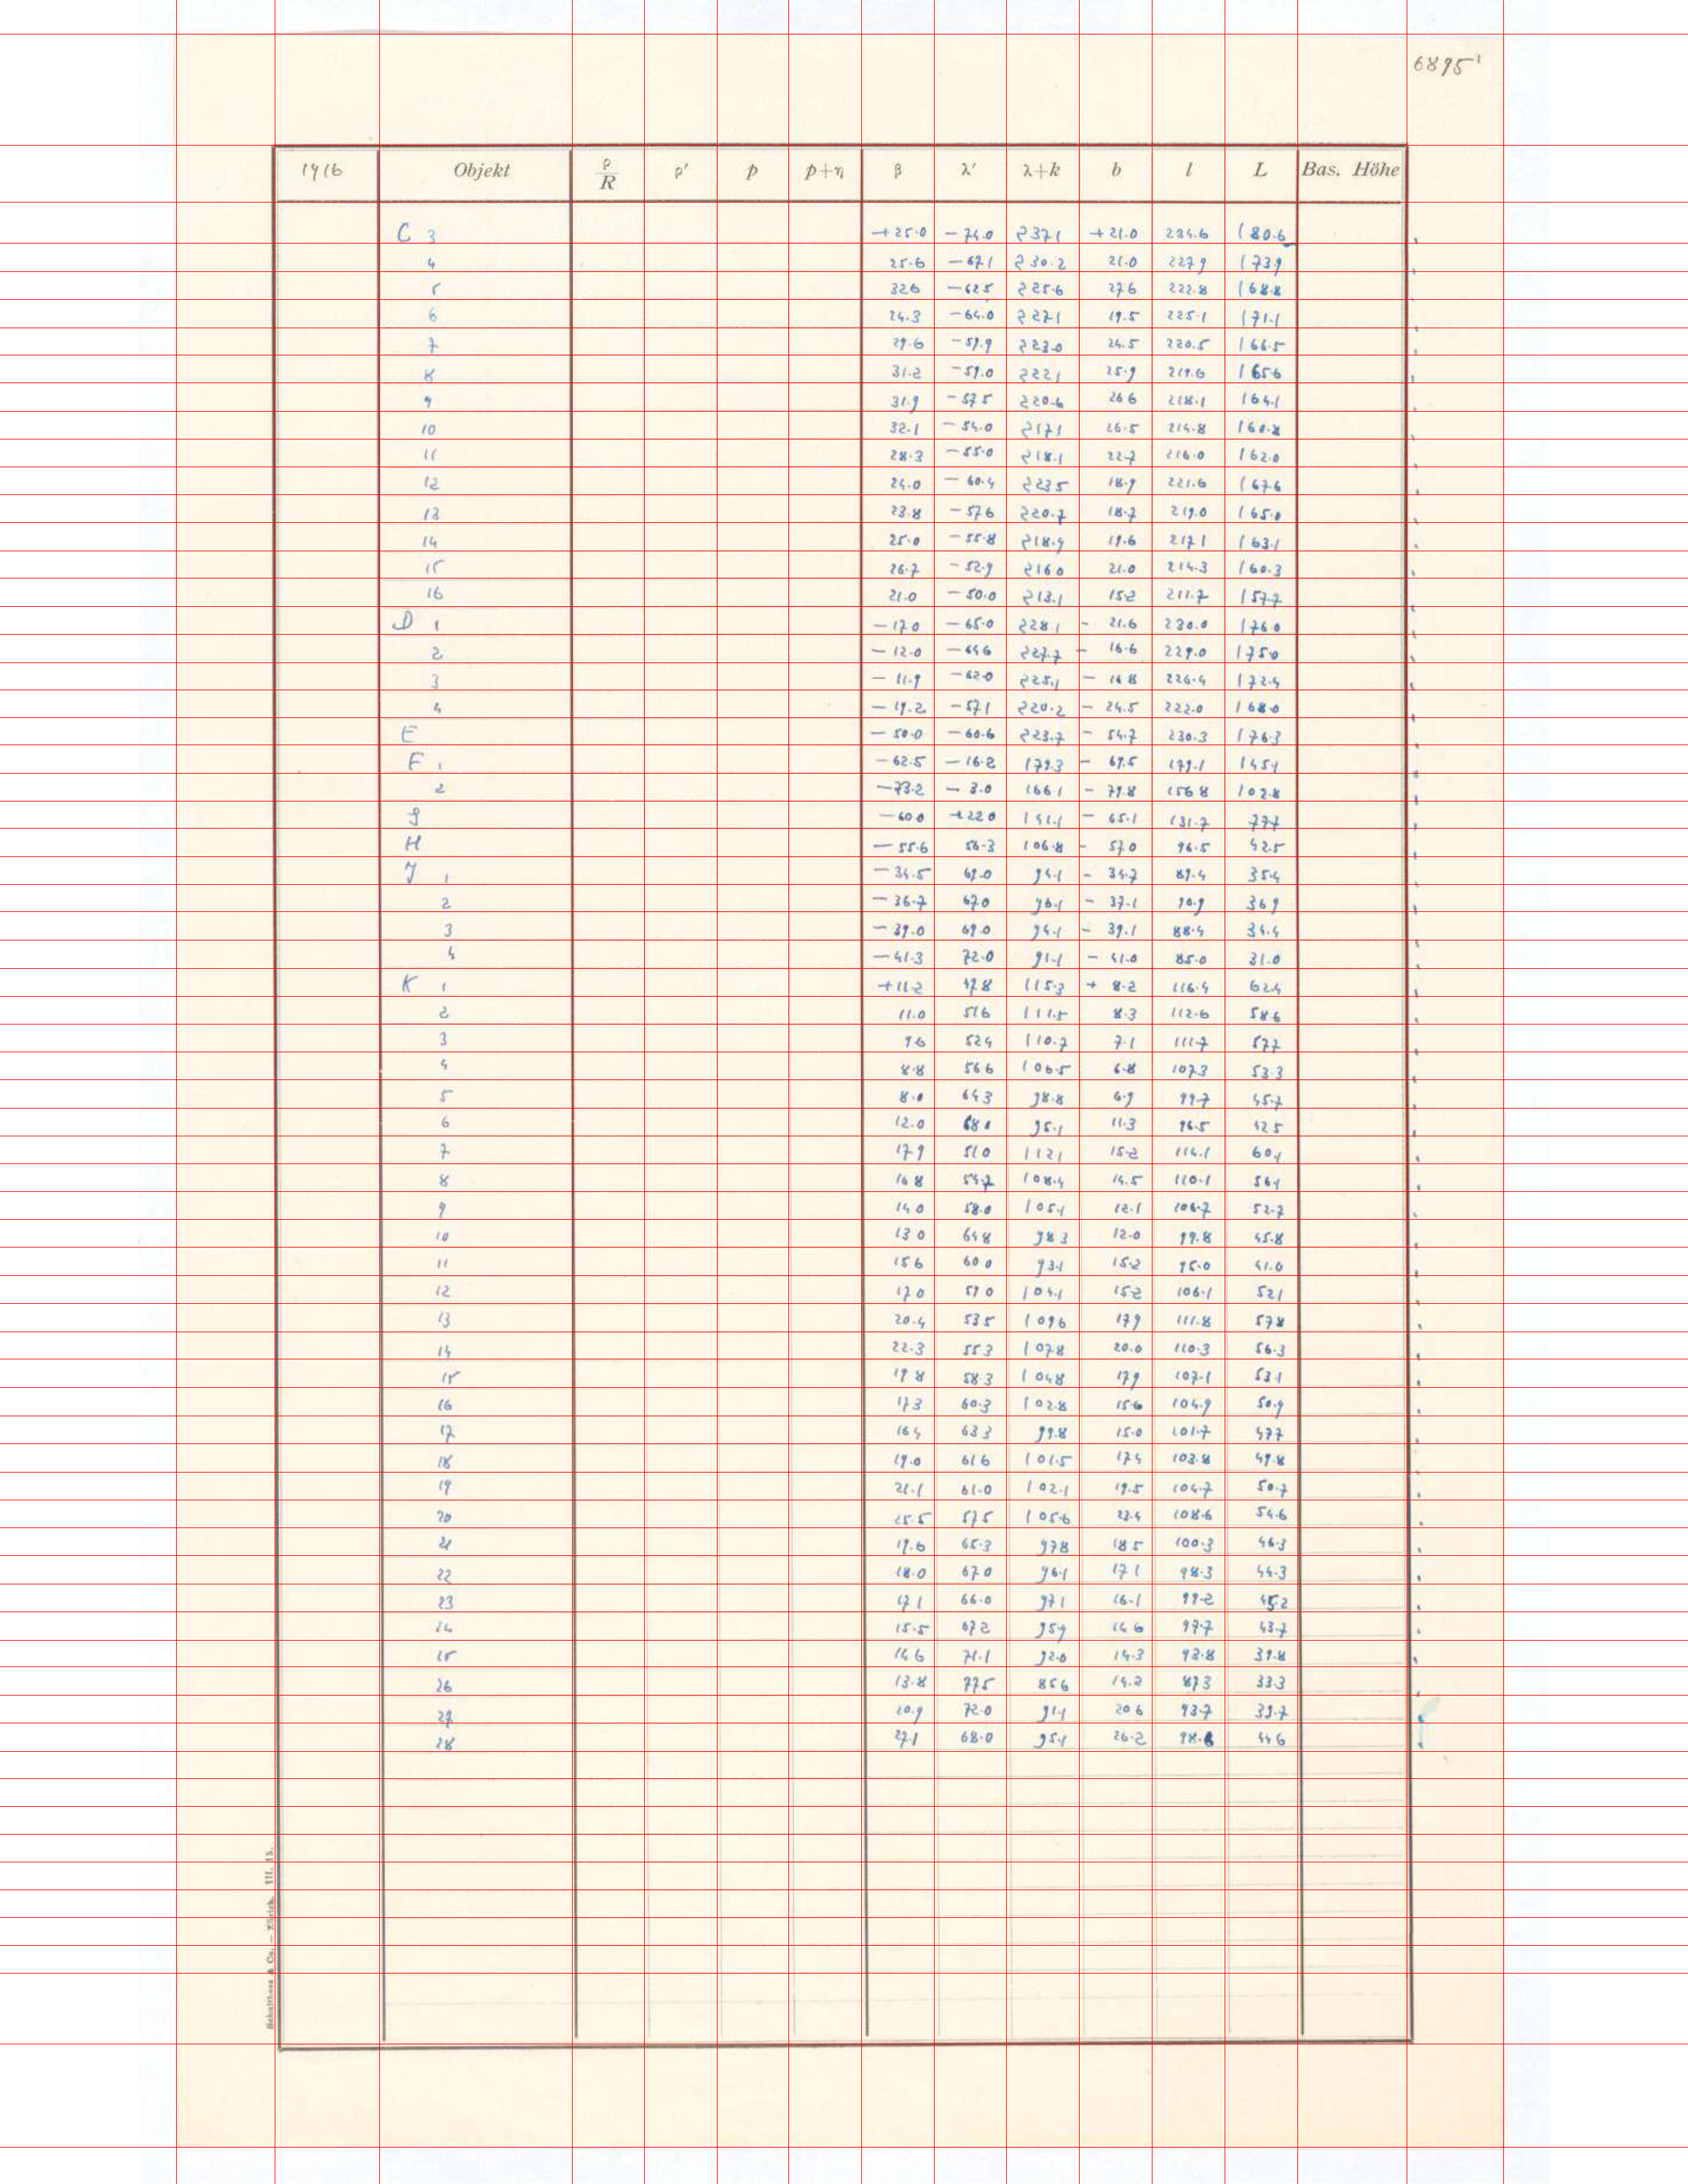

In [ ]:
cv2_imshow(color)

## Extracting cells

In [ ]:
numbers = []
distr = []

for i in range(len(vertical_lines) - 1):
  for j in range(len(horizontal_lines) - 1):
    x1 = vertical_lines[i]
    x2 = vertical_lines[i+1]
    y1 = horizontal_lines[j]
    y2 = horizontal_lines[j+1]

    
    summ = np.sum(img_bin[y1:y2,x1:x2])
    cell = img[y1:y2,x1:x2].copy()

    if (summ > 70000 and y2-y1 < 60 and x2-x1 < 125):
      # cv2_imshow(cell)
      distr.append(summ)
      numbers.append(cell)


In [ ]:
import seaborn as sns

sns.distplot(distr)

## Exporting images

In [ ]:
import os
mypath = "./images"
if not os.path.isdir(mypath):
   os.makedirs(mypath)

In [ ]:
from random import randint


for cell in numbers:
  cv2.imwrite("./images/_" + str(randint(1e16, 1e17-1))  + ".jpg", cell) 

In [ ]:
!zip -r /content/numbers.zip /content/images
from google.colab import files
files.download("/content/numbers.zip")